<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B3%5D_cHB_RF_Var_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.000000,0.001,0.001,0.001,0.001,0.001,0.001,85.50
30,30.906000,27.270,0.001,0.001,32.724,0.001,9.100,41.00
60,13.300000,25.500,0.001,0.001,38.700,0.001,0.001,27.10
90,6.521739,65.217,0.001,0.001,20.652,0.001,8.000,38.00
120,1.933333,23.433,66.400,0.001,7.967,0.001,0.001,23.60
150,0.001000,0.001,0.001,0.001,100.000,0.001,0.001,1.29
180,0.001000,0.001,39.200,35.100,0.001,20.200,0.001,26.98
210,0.001000,0.001,0.001,100.000,0.001,0.001,0.001,6.50


In [3]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.914957,26.309120,17.238889,7.373533,17.048222,9.141262,6.412529,27.438684
std,20.186968,25.336847,25.591166,15.388090,23.677315,17.012555,10.787539,16.748694
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.100000
25%,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,15.900000
50%,3.500000,23.077000,0.001000,0.001000,8.700000,0.001000,1.100000,24.700000
75%,13.880000,46.420000,29.200000,8.800000,25.460000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


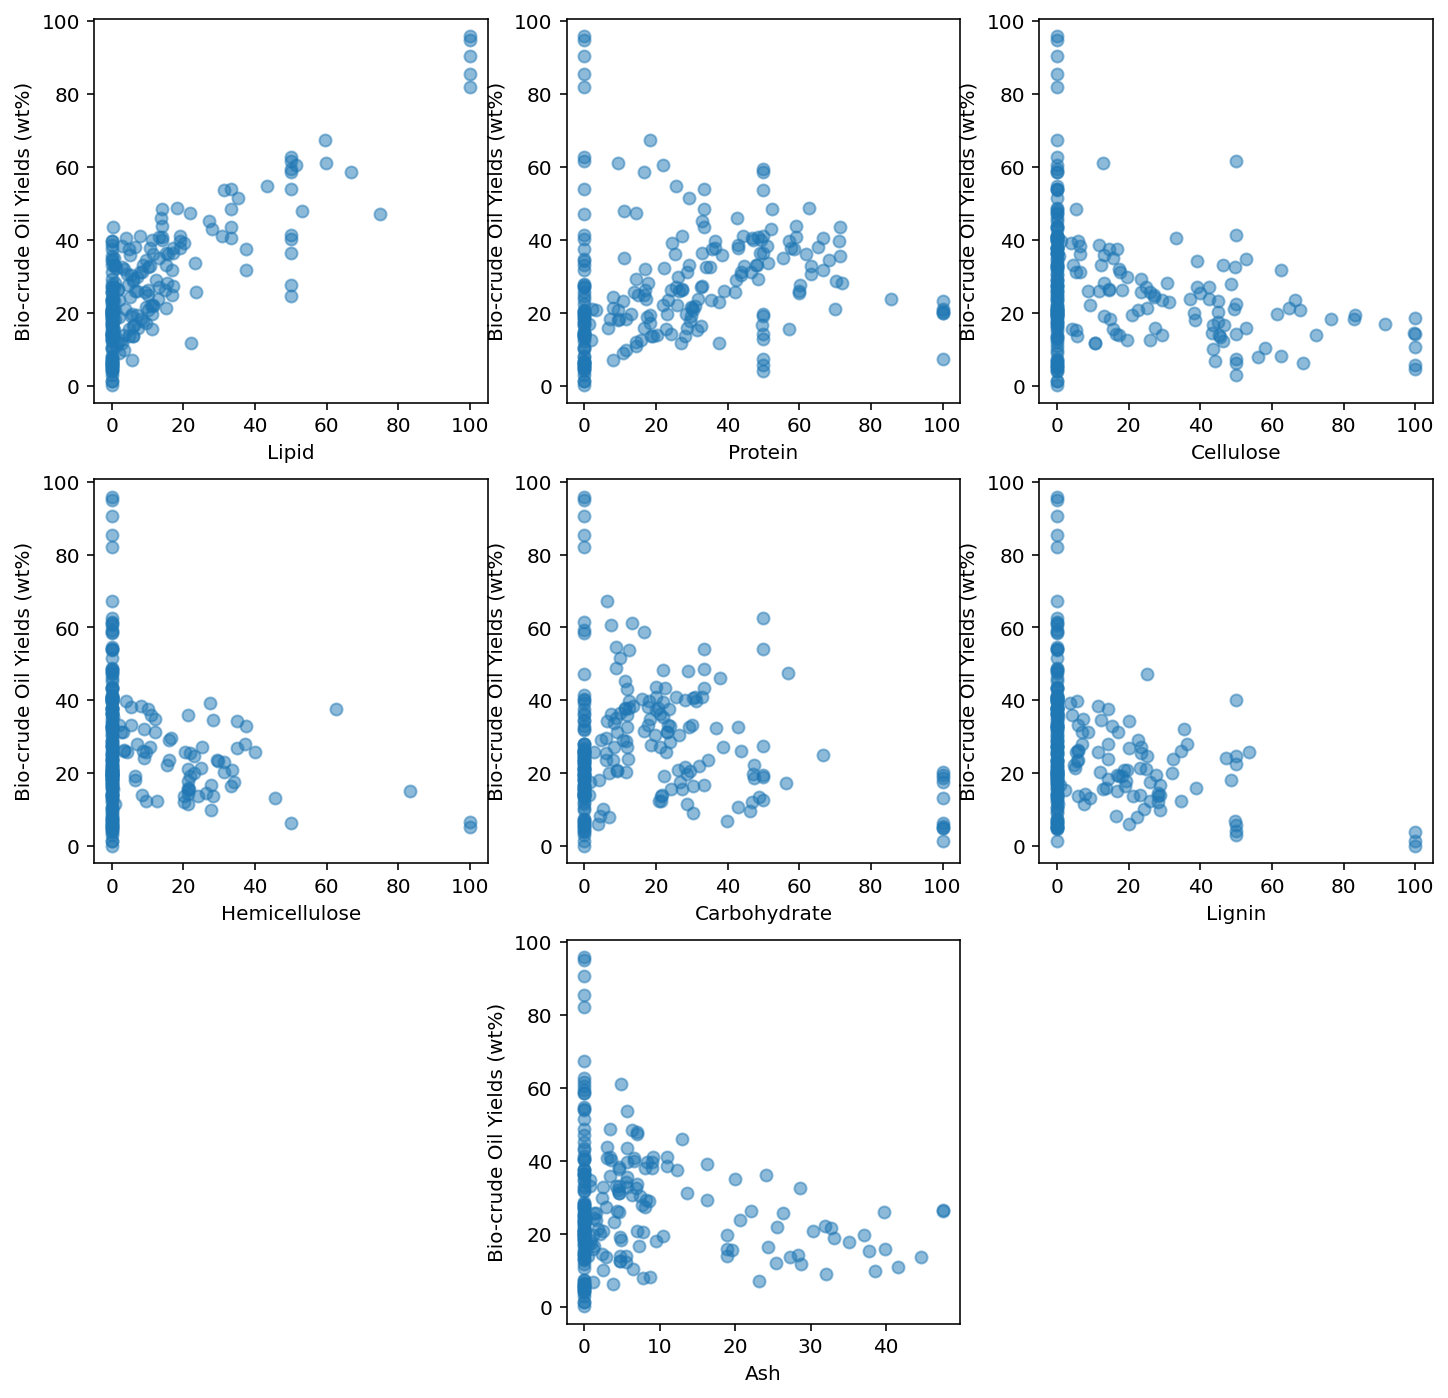

In [4]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

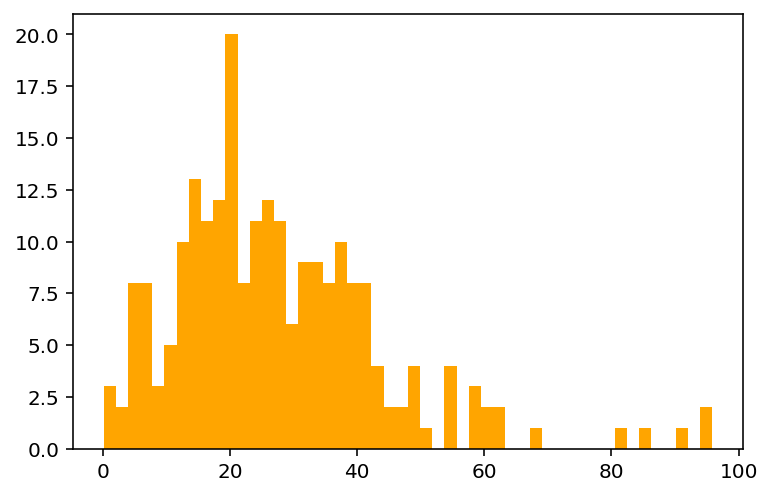

In [6]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  15.,  10.,  10.,  11.,   9.,   7.,   5.,   4.,   2.,
          3.,   0.,   2.,   0.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,  10.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([1.000000e-03, 2.000980e+00, 4.000960e+00, 6.000940e+00,
        8.000920e+00, 1.000090e+01, 1.200088e+01, 1.400086e+01,
        1.600084e+01, 1.800082e+01, 2.000080e+01, 2.200078e+01,
        2.400076e+01, 2.600074e+01, 2.800072e+01, 3.000070e+01,
        3.200068e+01, 3.400066e+01, 3.600064e+01, 3.800062e+01,
        4.000060e+01, 4.200058e+01, 4.400056e+01, 4.600054e+01,
        4.800052e+01, 5.000050e+01, 5.200048e+01, 5.400046e+01,
        5.600044e+01, 5.800042e+01, 6.000040e+01, 6.200038e+01,
        6.400036e+01, 6.600034e+01, 6.800032e+01, 7.000030e+01,
        7.200028e+01, 7.400026e+01, 7.600024e+01, 7.800022e+01,
        8.000020e+

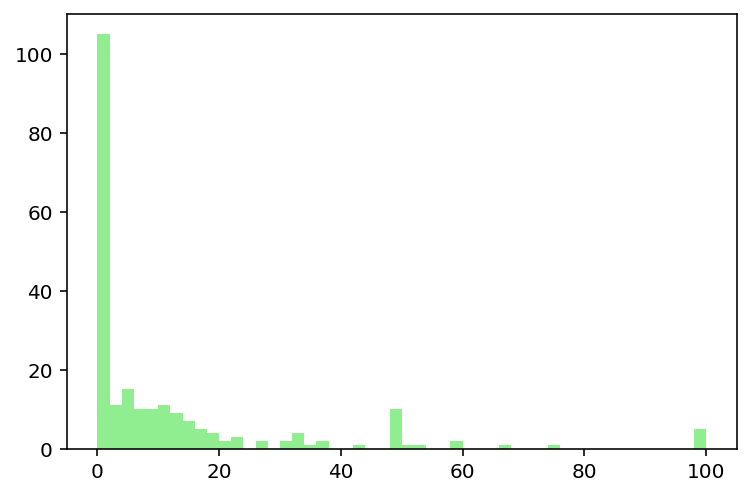

In [7]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


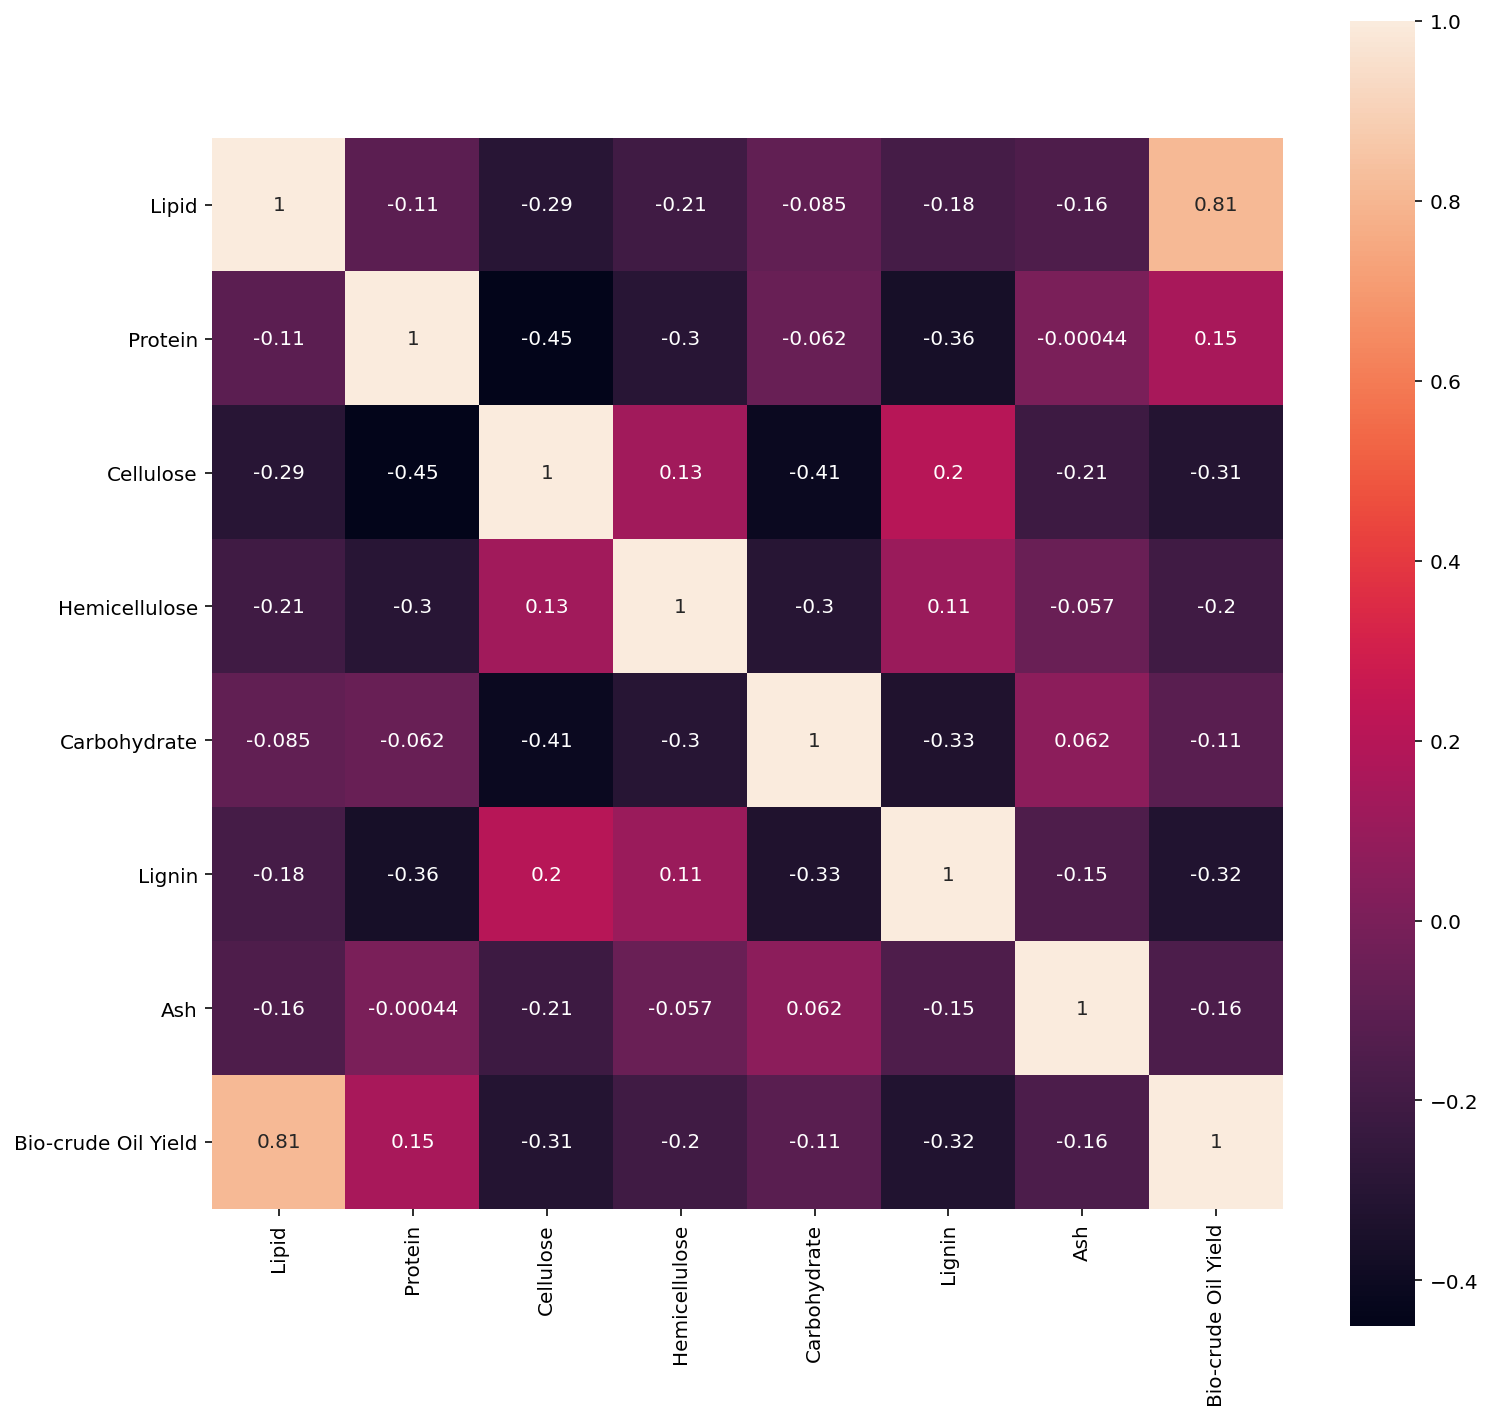

In [8]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [11]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [12]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 4.520850132340658
Optimal model has RMSE of test set: 6.55132093932062
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 36.84 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 36.48 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 30.71 wt%


In [13]:
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $35.63
Trial 2: $40.20
Trial 3: $37.70
Trial 4: $38.49
Trial 5: $38.86
Trial 6: $40.99
Trial 7: $38.78
Trial 8: $41.32
Trial 9: $36.78
Trial 10: $33.19

Range in prices: $8.13
Trial 1: $39.52
Trial 2: $40.38
Trial 3: $39.46
Trial 4: $37.18
Trial 5: $38.20
Trial 6: $35.21
Trial 7: $38.05
Trial 8: $38.85
Trial 9: $36.35
Trial 10: $37.46

Range in prices: $5.18
Trial 1: $32.74
Trial 2: $34.99
Trial 3: $31.66
Trial 4: $33.22
Trial 5: $32.13
Trial 6: $30.82
Trial 7: $31.52
Trial 8: $30.39
Trial 9: $33.70
Trial 10: $34.15

Range in prices: $4.60


In [19]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 10 folds.  
kf =KFold(n_splits=10, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of test set", np.std(MAE_train_all))
print("Mean value of MAE of training set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of test set", np.std(MRE_train_all))
print("Mean value of MRE of training set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 2.8683384277807322
Standard deviation of MAE of test set 0.11021494870674042
Mean value of MAE of training set 6.152588581481603
Standard deviation of MAE of test set 0.8345948391627159

Mean value of RMSE of training set 4.08909056657576
Standard deviation of RMSE of training set 0.15649190809931016
Mean value of RMSE of test set 7.956046688471228
Standard deviation of RMSE of test set 1.1175504820168383

Mean value of R2 of training set 0.9397640549895849
Standard deviation of R2 of training set 0.0064429047890365646
Mean value of R2 of test set 0.712816087678267
Standard deviation of R2 of test set 0.11952898484925664

Mean value of MRE of training set 0.10454767657754216
Standard deviation of MRE of test set 0.004144160456977875
Mean value of MRE of training set 0.22665589448329712
Standard deviation of MRE of test set 0.03878481906535784
225
225


Text(0.5, 1.0, 'y_pred vs. y_true')

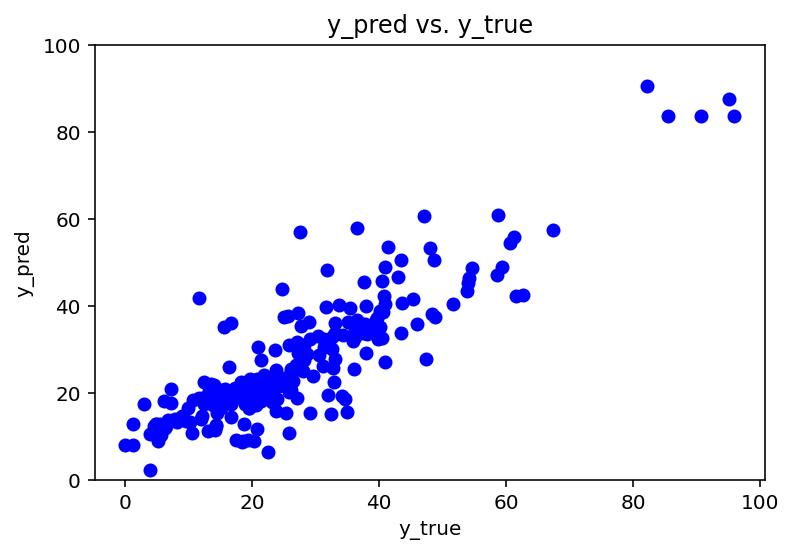

In [20]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [21]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

In [ ]:
def fit_model_tuning1(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features='auto')
  
  param_test1 = {'n_estimators':range(10,141,10)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test1, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)

  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning1(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'n_estimators': 70} for the optimal model.
Optimal model has RMSE of training set: 4.486508447125672
Optimal model has RMSE of test set: 6.700484522779181
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [ ]:
def fit_model_tuning2(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, min_samples_leaf=1, max_features='auto')
  
  param_test2 = {'max_depth':range(1,16,2),'min_samples_split':range(2,43,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test2, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning2(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'max_depth': 13, 'min_samples_split': 2} for the optimal model.
Optimal model has RMSE of training set: 4.458782935335429
Optimal model has RMSE of test set: 6.729938638298037
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [ ]:
def fit_model_tuning3(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, max_features='auto')
  
  param_test3 = {'min_samples_split':range(2,43,20),'min_samples_leaf':range(1,42,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test3, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning3(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'min_samples_leaf': 1, 'min_samples_split': 2} for the optimal model.
Optimal model has RMSE of training set: 4.404620581949159
Optimal model has RMSE of test set: 6.480535133251623
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [ ]:
def fit_model_tuning4(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, min_samples_split=2, min_samples_leaf=1)
  
  param_test4 = {'max_features':range(1,7,1)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test4, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning4(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'max_features': 6} for the optimal model.
Optimal model has RMSE of training set: 4.367443375627148
Optimal model has RMSE of test set: 6.620225804491208
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
params = {'n_estimators':70,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 4.491368386486819
Optimal model has RMSE of test set: 6.506274335757428
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 35.05 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 36.66 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 30.29 wt%


In [ ]:
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $34.18
Trial 2: $42.07
Trial 3: $41.24
Trial 4: $37.34
Trial 5: $39.89
Trial 6: $39.18
Trial 7: $39.65
Trial 8: $40.27
Trial 9: $36.92
Trial 10: $33.05

Range in prices: $9.02
Trial 1: $38.45
Trial 2: $42.22
Trial 3: $37.44
Trial 4: $35.13
Trial 5: $37.11
Trial 6: $35.04
Trial 7: $39.23
Trial 8: $38.50
Trial 9: $35.92
Trial 10: $39.39

Range in prices: $7.18
Trial 1: $31.94
Trial 2: $34.31
Trial 3: $32.91
Trial 4: $32.48
Trial 5: $32.98
Trial 6: $31.15
Trial 7: $31.01
Trial 8: $30.16
Trial 9: $33.69
Trial 10: $35.05

Range in prices: $4.88


In [28]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 10 folds.  
kf =KFold(n_splits=10, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':70,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of test set", np.std(MAE_train_all))
print("Mean value of MAE of training set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of test set", np.std(MRE_train_all))
print("Mean value of MRE of training set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 2.879625989411302
Standard deviation of MAE of test set 0.12075418635695183
Mean value of MAE of training set 6.1489765879361835
Standard deviation of MAE of test set 0.8964746410854413

Mean value of RMSE of training set 4.085151386975026
Standard deviation of RMSE of training set 0.1864615555675631
Mean value of RMSE of test set 7.9231691576119685
Standard deviation of RMSE of test set 1.1573826855073521

Mean value of R2 of training set 0.9398395799998776
Standard deviation of R2 of training set 0.00715395942037966
Mean value of R2 of test set 0.7137117243185587
Standard deviation of R2 of test set 0.12152284235604885

Mean value of MRE of training set 0.104955171802995
Standard deviation of MRE of test set 0.00443619182639235
Mean value of MRE of training set 0.22666363123555272
Standard deviation of MRE of test set 0.04140416635374665


Text(0.5, 1.0, 'y_pred vs. y_true')

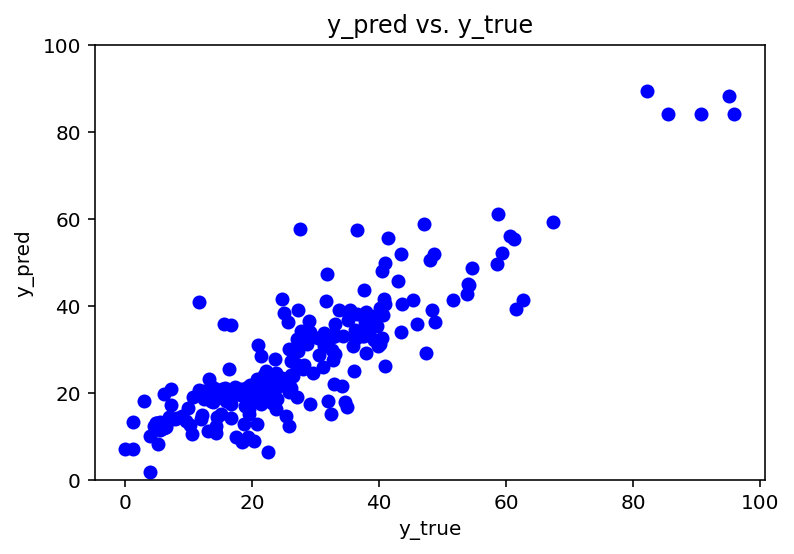

In [29]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [30]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.706623
 2) Protein                        0.119553
 3) Cellulose                      0.043365
 4) Lignin                         0.035828
 5) Carbohydrate                   0.035336
 6) Ash                            0.030767
 7) Hemicellulose                  0.028528


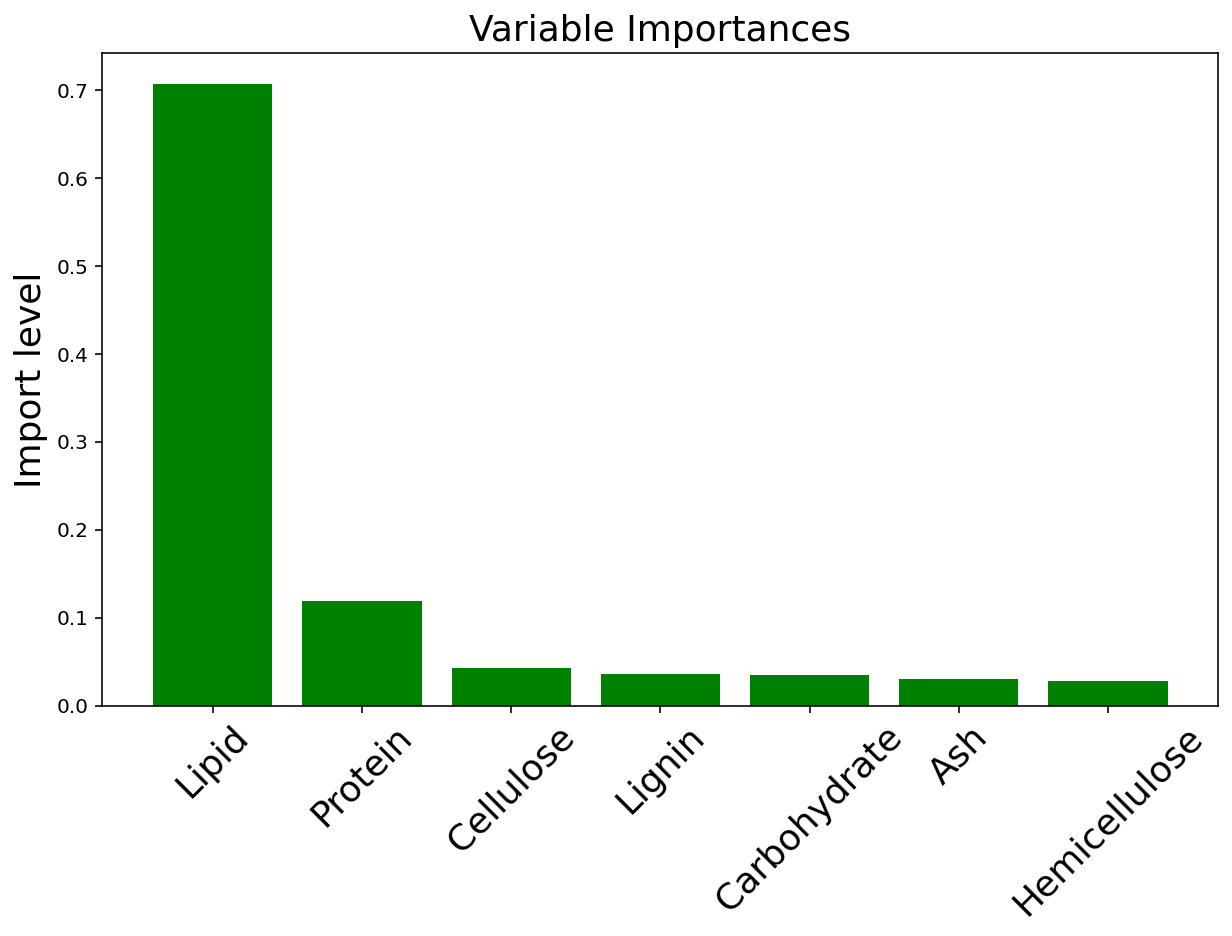

In [31]:
import matplotlib.pyplot as plt

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Variable Importances.png')